# Attention mechanism and transformer
**Objectives**

At the end of this lab, you should:
- Have demonstrated good understanding of attention mechanism and it application in the transformer model


## Attention Mechanism: Building Blocks
- Self-Attention
- Query, Key, and Values
- NN representation of Attention
- Multi-head Attention
- Coding Tasks


### Self-Attention
Context is key in machine translation and all other applications of attention mechanism. As opposed to relating each words in a sentence to its neighbour, they are rather compared with one another in establishing the correct contextual relations. This approach of adding context to each of the words is termed **``Self-Attention!``**

**Consider the following illustration**

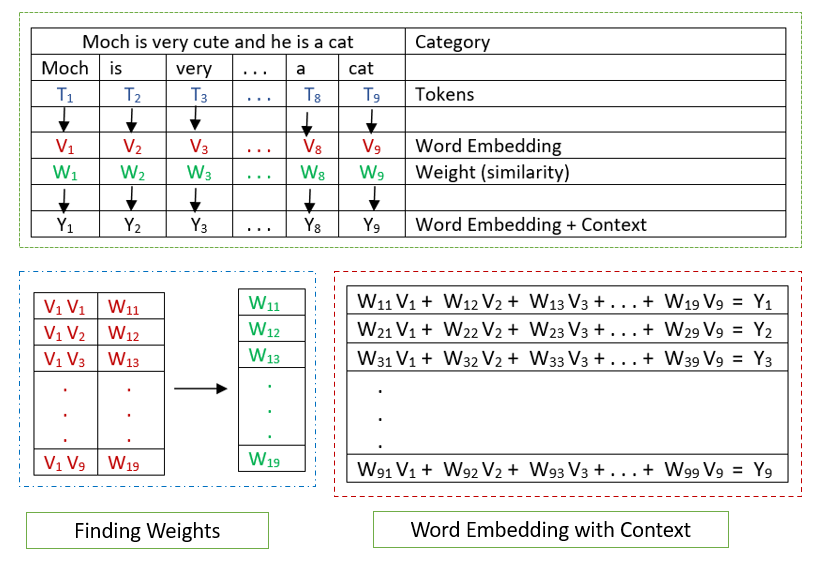

###**Query, Keys, and Values**
So far, we have not introduced any sort of training to our 'model'. Adding some forms of trainable parameter can expose the 'network' to learning some patterns - enhancing the context knowledge. We can have some set of parameters in a matrix whose values are trained. This concept ushered in the idea of ``Query, Key and Value``

From the attention section, notice that the initial word embedding ($V_i$) appeared/used in 3 different places:

- Dot product between first word and others (to get the weight) - ``Query``
- Dot product between first word and itself (final embedding + context) - `Keys`
- Dot product of Words and Weights `Values`

Now, assuming we are interested in all the words similar with respect to $V_1$, $V_1$ is sent as the **Query** word. Then query word will do a dot product with all the words ($V_i$ where 1<i<9) - These are the **Keys**. So the combination of the Query and the Keys give us the weights. These weights are then multiplied with all the words again ($V_1$ to $V_9$) which act as Values

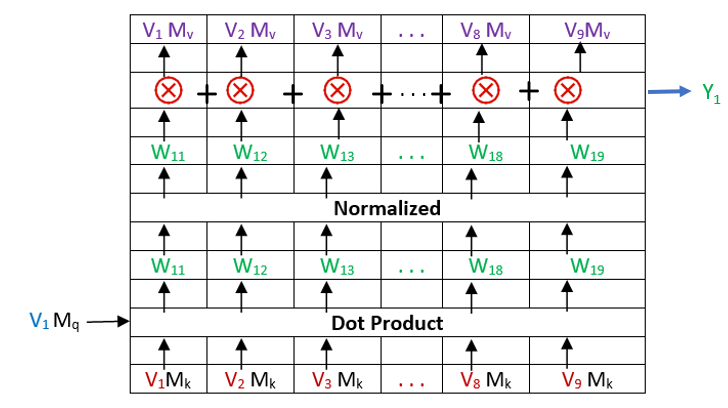

To introduce trainable parameters, we will bring matrixes of dimension KxK  as $M_q, M_k, and M_v$ respectively; to be multiplied with vectors Q, K and V respectively. These matrixes will be trained by neural network to give better meaning to the context.




Recall, in the concept of (relational) database  retrieval, `Select value from Table where Key` returns the value that correspond to the supplied key! The concept here is similar. The following depicts the representation of aattention mechanism

\begin{equation}
attention(q,k,v) = \sum_i\left(similarity(q,k_i)*v_i\right)
\end{equation}

1. The similarity between the query q, and each key-value $k_i$ is measured
2. The similarity returns a weight for each key value pair
3. Then, the weighted sum of all the values is outputed

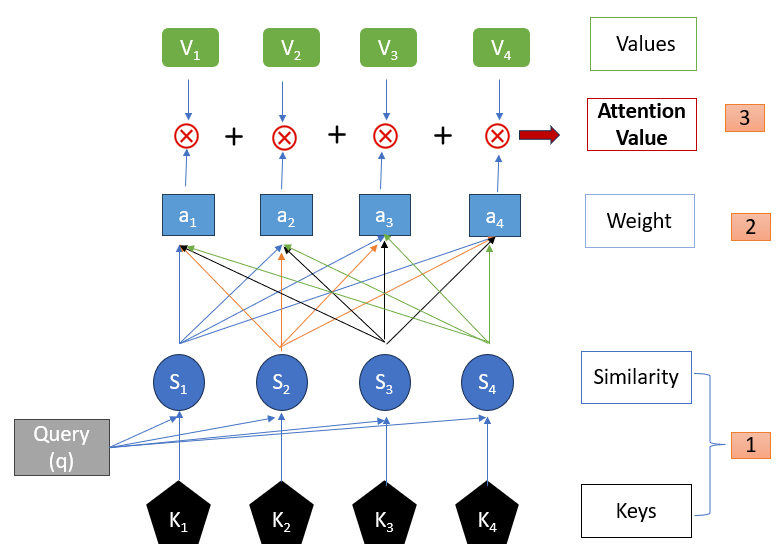

A shown from the above illustration, attention values can be derived in 3 steps:
1. Given the query and the keys (embedding vectors), we can calculate the similarity. Several approaches can be used in obtaining this value. Among the most frequently used ones are: *dot product* and *Scaled dot product*:

$S_i = q^Tk_i/\sqrt{d}$ (where d is the dimensionality of each key)

Other are: dot product, general dot prodot, and Kernel methods.

2. To find the weights `a`, we'd apply the *Softmax* function:

$a_i = exp(S_i)/\sum exp(S_j)$

3. Finally, obtain the attention value by finding the weighted sum of `Softmax(a)` with their corresponding values (V).

$attention value = \sum a_iV_i$

### Attention Mechanism Representation as NN
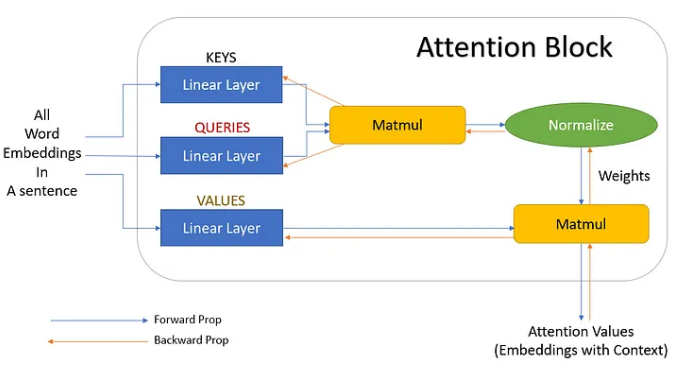

The word embeddings are initially routed through a series of linear layers. These linear layers lack a 'bias' term and are hence nothing more than matrix multiplications. One of these levels is indicated as 'keys', the other as 'queries', and the last one as 'values'. The weights are obtained by performing a matrix multiplication between the keys and the queries, which is then normalised. The weights are then multiplied by the values and added together to get the final attention vector. This block can then be implemented in Neural Network.

**`Multi-Head Attention`** : are three heads always better than one?

Consider Cat in relationship with Moch, he, cute. Using three attention block that are running in parallel will surely provide mode context (to the word cat)efficiently.

### Attention Mechanism Coding Tasks
In thi section, we will implement some of the building block that we have discussed in preparation for transformer

In [ ]:
# @title Install dependencies
# @markdown There may be *errors* and/or *warnings* reported during the installation. However, they are to be ignored.
!pip install tensorboard --quiet
!pip install transformers --quiet
!pip install datasets --quiet
!pip install pytorch_pretrained_bert --quiet
!pip install torchtext --quiet
!pip install --upgrade gensim --quiet

In [ ]:
# @title Set environment variables

import os
os.environ['TA_CACHE_DIR'] = 'data/'
os.environ['NLTK_DATA'] = 'nltk_data/'

In [ ]:
# Imports
import os
import sys
import math
import nltk
import torch
import random
import string
import datasets
import statistics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pprint import pprint
from tqdm.notebook import tqdm
from abc import ABC, abstractmethod

from nltk.corpus import brown
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchtext.vocab import Vectors
from transformers import AutoTokenizer

from pytorch_pretrained_bert import BertTokenizer
from pytorch_pretrained_bert import BertForMaskedLM

%load_ext tensorboard

In [ ]:
# @title Download NLTK data (`punkt`, `averaged_perceptron_tagger`, `brown`, `webtext`)


#NLTK Download:

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
nltk.download('webtext')


import os, requests, zipfile

os.environ['NLTK_DATA'] = 'nltk_data/'

fname = 'nltk_data.zip'
url = 'https://osf.io/download/zqw5s/'

r = requests.get(url, allow_redirects=True)

with open(fname, 'wb') as fd:
  fd.write(r.content)

with zipfile.ZipFile(fname, 'r') as zip_ref:
  zip_ref.extractall('.')

In [ ]:
# @title Helper functions
global category
global brown_wordlist
global w2vmodel
category = ['editorial', 'fiction', 'government', 'mystery', 'news',
                   'religion', 'reviews', 'romance', 'science_fiction']
brown_wordlist = list(brown.words(categories=category))
print(brown_wordlist)

def create_word2vec_model(category = 'news', size = 50, sg = 1, min_count = 10):
    sentences = brown.sents(categories=category)
    model = Word2Vec(sentences, vector_size=size, sg=sg, min_count=min_count)
    return model

w2vmodel = create_word2vec_model(category)

def model_dictionary(model):
  print(w2vmodel.wv)
  words = list(w2vmodel.wv)
  return words

def get_embedding(word, model):
  try:
    return model.wv[word]
  except KeyError:
    print(f' |{word}| not in model dictionary. Try another word')

def check_word_in_corpus(word, model):
  try:
    word_embedding = model.wv[word]
    print('Word present!')
    return word_embedding
  except KeyError:
    print('Word NOT present!')
    return None

def get_embeddings(words,model):
  size = w2vmodel.layer1_size
  embed_list = [get_embedding(word,model) for word in words]
  return np.array(embed_list)

def softmax(x):
    f_x = "Todo"
    return f_x

### Interactive Demo 2: Intution behind Attention

To further understand how attention works, let us consider an example of the word 'bank', which has an ambigious **meaning** dependent upon the **context** of the sentence (Word embedding captures these meanings based on context) . Let the word 'bank' be the query and consider two keys, each with a different meaning of the word 'bank'.

Check out the attention scores of different words in the sentences and the words similar to the final value embedding.

In this example we use a simplified model of scaled dot-attention with no linear projections and the word2vec model is used to embed the words.



In [ ]:
# @title Enter your own query/keys
def get_value_attention(w2vmodel, query, keys):
  """
  Function to compute the scaled dot product

  Args:
    w2vmodel: nn.Module
      Embedding model on which attention scores need to be calculated
    query: string
      Query string
    keys: string
      Key string

  Returns:
    None
  """
  # Get the Word2Vec embedding of the query
  query_embedding = get_embedding(query, w2vmodel)
  # Print similar words to the query
  print(f'Words Similar to Query ({query}):')
  query_similar_words = w2vmodel.wv.similar_by_word(query)
  for idx in range(len(query_similar_words)):
    print(f'{idx+1}. {query_similar_words[idx]}')
  # Get scaling factor i.e. the embedding size
  scale = w2vmodel.layer1_size
  # Get the Word2Vec embeddings of the keys
  keys = keys.split(' ')
  key_embeddings = get_embeddings(keys, w2vmodel)
  # Calculate unscaled attention scores
  attention = np.dot(query_embedding , key_embeddings.T )
  # Scale the attention scores
  scaled_attention =  attention / np.sqrt(scale)
  # Normalize the scaled attention scores to calculate the probability distribution
  softmax_attention = "Todo"
  # Print attention scores
  print(f'\nScaled Attention Scores: \n {list(zip(keys, softmax_attention))} \n')
  # Calculate the value
  value = "Todo"
  # Print words similar to the calculated value
  print(f'Words Similar to the final value:')
  value_similar_words = w2vmodel.wv.similar_by_vector(value)
  for idx in range(len(value_similar_words)):
    print(f'{idx+1}. {value_similar_words[idx]}')
  return None


# w2vmodel model is created in helper functions
query = 'bank'  # @param \['bank']
keys = 'river bank cold water'  # @param \['bank customer need money', 'river bank cold water']
get_value_attention(w2vmodel, query, keys)

### Task 1: Dot product attention

In this exercise, let's compute the scaled dot product attention using its matrix form.

\begin{equation}
\mathrm{softmax} \left( \frac{Q K^\text{T}}{\sqrt{d}} \right) V
\end{equation}

where $Q$ denotes the query or values of the embeddings (in other words the hidden states), $K$ the key, and $k$ denotes the dimension of the query key vector.

The division by square-root of d is to stabilize the gradients.

Note: the function takes an additional argument `h` (number of heads). You can assume it is 1 for now.

In [ ]:
class DotProductAttention(nn.Module):
  """ Scaled dot product attention. """

  def __init__(self, dropout, **kwargs):
    """
    Constructs a Scaled Dot Product Attention Instance.

    Args:
      dropout: Integer
        Specifies probability of dropout hyperparameter

    Returns:
      Nothing
    """
    super(DotProductAttention, self).__init__(**kwargs)
    self.dropout = nn.Dropout(dropout)

  def calculate_score(self, queries, keys):
      """
      Compute the score between queries and keys.

      Args:
      queries: Tensor
        Query is your search tag/Question
        Shape of `queries`: (`batch_size`, no. of queries, head,`k`)
      keys: Tensor
        Descriptions associated with the database for instance
        Shape of `keys`: (`batch_size`, no. of key-value pairs, head, `k`)
      """
      return torch.bmm(queries, keys.transpose(1, 2)) / math.sqrt(queries.shape[-1])

  def forward(self, queries, keys, values, b, h, t, k):
    """
    Compute dot products. This is the same operation for each head,
    so we can fold the heads into the batch dimension and use torch.bmm
    Note: .contiguous() doesn't change the actual shape of the data,
    but it rearranges the tensor in memory, which will help speed up the computation
    for this batch matrix multiplication.
    .transpose() is used to change the shape of a tensor. It returns a new tensor
    that shares the data with the original tensor. It can only swap two dimensions.

    Args:
      queries: Tensor
        Query is your search tag/Question
        Shape of `queries`: (`batch_size`, no. of queries, head,`k`)
      keys: Tensor
        Descriptions associated with the database for instance
        Shape of `keys`: (`batch_size`, no. of key-value pairs, head, `k`)
      values: Tensor
        Values are returned results on the query
        Shape of `values`: (`batch_size`, head, no. of key-value pairs,  `k`)
      b: Integer
        Batch size
      h: Integer
        Number of heads
      t: Integer
        Number of keys/queries/values (for simplicity, let's assume they have the same sizes)
      k: Integer
        Embedding size

    Returns:
      out: Tensor
        Matrix Multiplication between the keys, queries and values.
    """
    keys = keys.transpose(1, 2).contiguous().view(b * h, t, k)
    queries = "Todo"
    values = "Todo"

    # Matrix Multiplication between the keys and queries
    score = self.calculate_score(queries, keys)  # size: (b * h, t, t)
    softmax_weights = F.softmax(score, dim=2)  # row-wise normalization of weights

    # Matrix Multiplication between the output of the key and queries multiplication and values.
    out = torch.bmm(self.dropout(softmax_weights), values).view(b, h, t, k)  # rearrange h and t dims
    out = out.transpose(1, 2).contiguous().view(b, t, h * k)

    return out

In [ ]:
# @title Task Executor!

# Instantiate dot product attention
dot_product_attention = DotProductAttention(0)

# Encode query, keys, values and answers
queries = torch.Tensor([[[[12., 2., 17., 88.]], [[1., 43., 13., 7.]], [[69., 48., 18, 55.]]]])
keys = torch.Tensor([[[[10., 99., 65., 10.]], [[85., 6., 114., 53.]], [[25., 5., 3, 4.]]]])
values = torch.Tensor([[[[33., 32., 18., 3.]], [[36., 77., 90., 37.]], [[19., 47., 72, 39.]]]])
answer = torch.Tensor([[[36., 77., 90., 37.], [33., 32., 18.,  3.], [36., 77., 90., 37.]]])

b, t, h, k = queries.shape

# Find dot product attention
out = dot_product_attention(queries, keys, values, b, h, t, k)

if torch.equal(out, answer):
  print('Correctly implemented!')
else:
  print('ERROR!')

### Task 2: $Q$, $K$, $V$ attention

In self-attention, the queries, keys, and values are all mapped (by linear projection) from the word embeddings. Implement the mapping functions (`to_keys`, `to_queries`, `to_values`) below.

In [ ]:
class SelfAttention(nn.Module):
  """  Multi-head self attention layer. """

  def __init__(self, k, heads=8, dropout=0.1):
    """
    Initiates the following attributes:
    to_keys: Transforms input to k x k*heads key vectors
    to_queries: Transforms input to k x k*heads query vectors
    to_values: Transforms input to k x k*heads value vectors
    unify_heads: combines queries, keys and values to a single vector

    Args:
      k: Integer
        Size of attention embeddings
      heads: Integer
        Number of attention heads

    Returns:
      Nothing
    """
    super().__init__()
    self.k, self.heads = k, heads

    self.to_keys = nn.Linear(k, k * heads, bias=False)
    self.to_queries = "Todo"
    self.to_values = "Todo"
    self.unify_heads = nn.Linear(k * heads, k)

    self.attention = DotProductAttention(dropout)

  def forward(self, x):
    """
    Implements forward pass of self-attention layer

    Args:
      x: Tensor
        Batch x t x k sized input

    Returns:
      unify_heads: Tensor
        Self-attention based unified Query/Value/Key tensors
    """
    b, t, k = x.size()
    h = self.heads

    # We reshape the queries, keys and values so that each head has its own dimension
    queries = self.to_queries(x).view(b, t, h, k)
    keys = self.to_keys(x).view(b, t, h, k)
    values = self.to_values(x).view(b, t, h, k)

    out = self.attention(queries, keys, values, b, h, t, k)

    return self.unify_heads(out)

#Transformer overview I

In our prior discussions, we delved into the limitations of RNNs. To recap, I've provided a brief overview of these drawbacks below. Let's form smaller teams and explore how the attention mechanism, which we recently covered, can address these challenges.

*   Long-term Dependencies: RNNs struggle with long-term dependencies in sequences.

*   Vanishing and Exploding Gradients: Training RNNs can be hampered by the vanishing and exploding gradient problems.

*   Sequential Processing: RNNs process sequences step-by-step, which is not optimal for parallel computing.

*   Limited Context Window: In practical RNN implementations, like LSTM or GRU, the effective context window can be limited.

*   Difficulty in Capturing Relationships: RNNs can struggle to understand relationships between distant words in a sequence.

*   Fixed-size Memory: RNNs have a fixed-size memory (hidden state) which might be insufficient for longer sequences.


Reading Material for Further Insights:

*   https://nlp.seas.harvard.edu/2018/04/03/attention.html
*   https://towardsdatascience.com/transformers-141e32e69591

##Introduction to Transformers:

Transformers, introduced by [Vaswani et al](https://arxiv.org/abs/1706.03762). in 2017, are a novel architecture primarily designed to handle sequence data, much like RNNs and LSTMs. However, unlike RNNs, which process sequences sequentially, transformers leverage attention mechanisms to process input data in parallel. This characteristic allows transformers to capture long-term dependencies in data more effectively, often resolving the long-standing issue RNNs had with long sequences, known as the vanishing gradient problem.

Delve deeper into "vanishing gradient problem" [here](https://proceedings.mlr.press/v28/pascanu13.pdf).

The advent of LSTM helped to overcome vanishing and exploding gradients in the RNN model, but there are still problems inherited from the RNN model, like:

*   No parallelization, we still have a sequential path for the data, even more
complicated than before.
*   Hardware resources are still a problem.



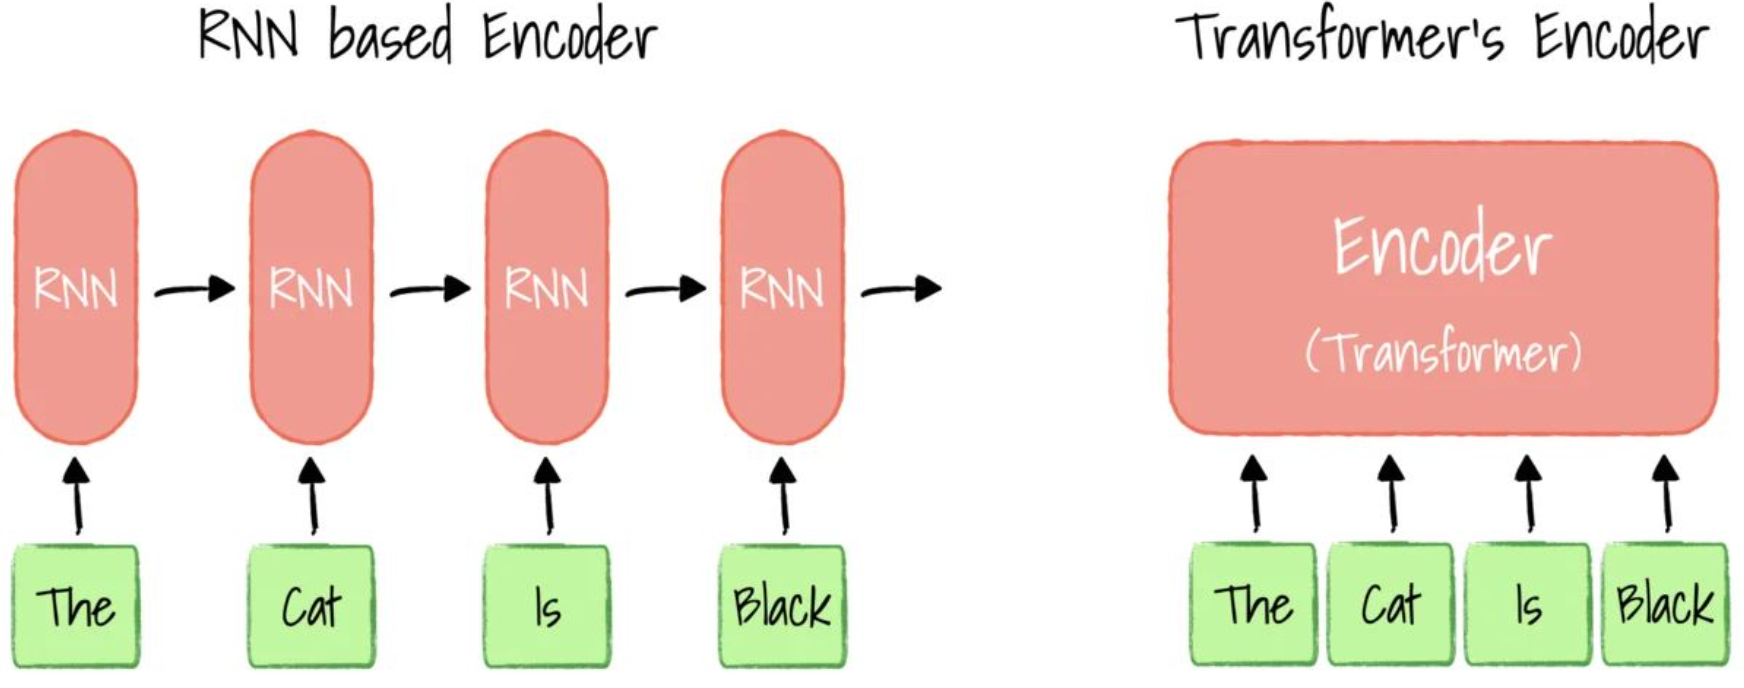

*Image courtesy: jinglescode.github.io*

## Building Blocks of Transformers:
A typical transformer model comprises an encoder and a decoder, but for many tasks like text classification, only the encoder is used. In this section, we will discuss the building blocks of the transformer encoder.

*   **Self Attention**: At the heart of the transformer is the self-attention mechanism. It allows the model to focus on different words in a sequence when processing a particular word. Essentially, for each word, it computes a weighted sum of all words in the sequence, where the weights determine the importance of other words when representing the current word.

*  **Layer Normalization**: Normalization techniques are crucial in deep learning, ensuring that activations don't reach extremely high or low values, making training more stable. Layer normalization is one such technique used in transformers.In transformers, layer normalization is applied before each sub-block (like self-attention or feed-forward networks), and the original inputs are added to the outputs of these sub-blocks (residual connections). This setup assists in preventing the vanishing gradient problem and accelerates training. Thus, it helps in stabilizing the training of models. More information can be found in this [paper](arxiv:1607.06450).

*  **Feed Forward Neural Networks**: After the attention scores are obtained, they are passed through feedforward neural networks independently at each position. This network doesn't consider the specific sequence's order, focusing instead on refining individual token representations.

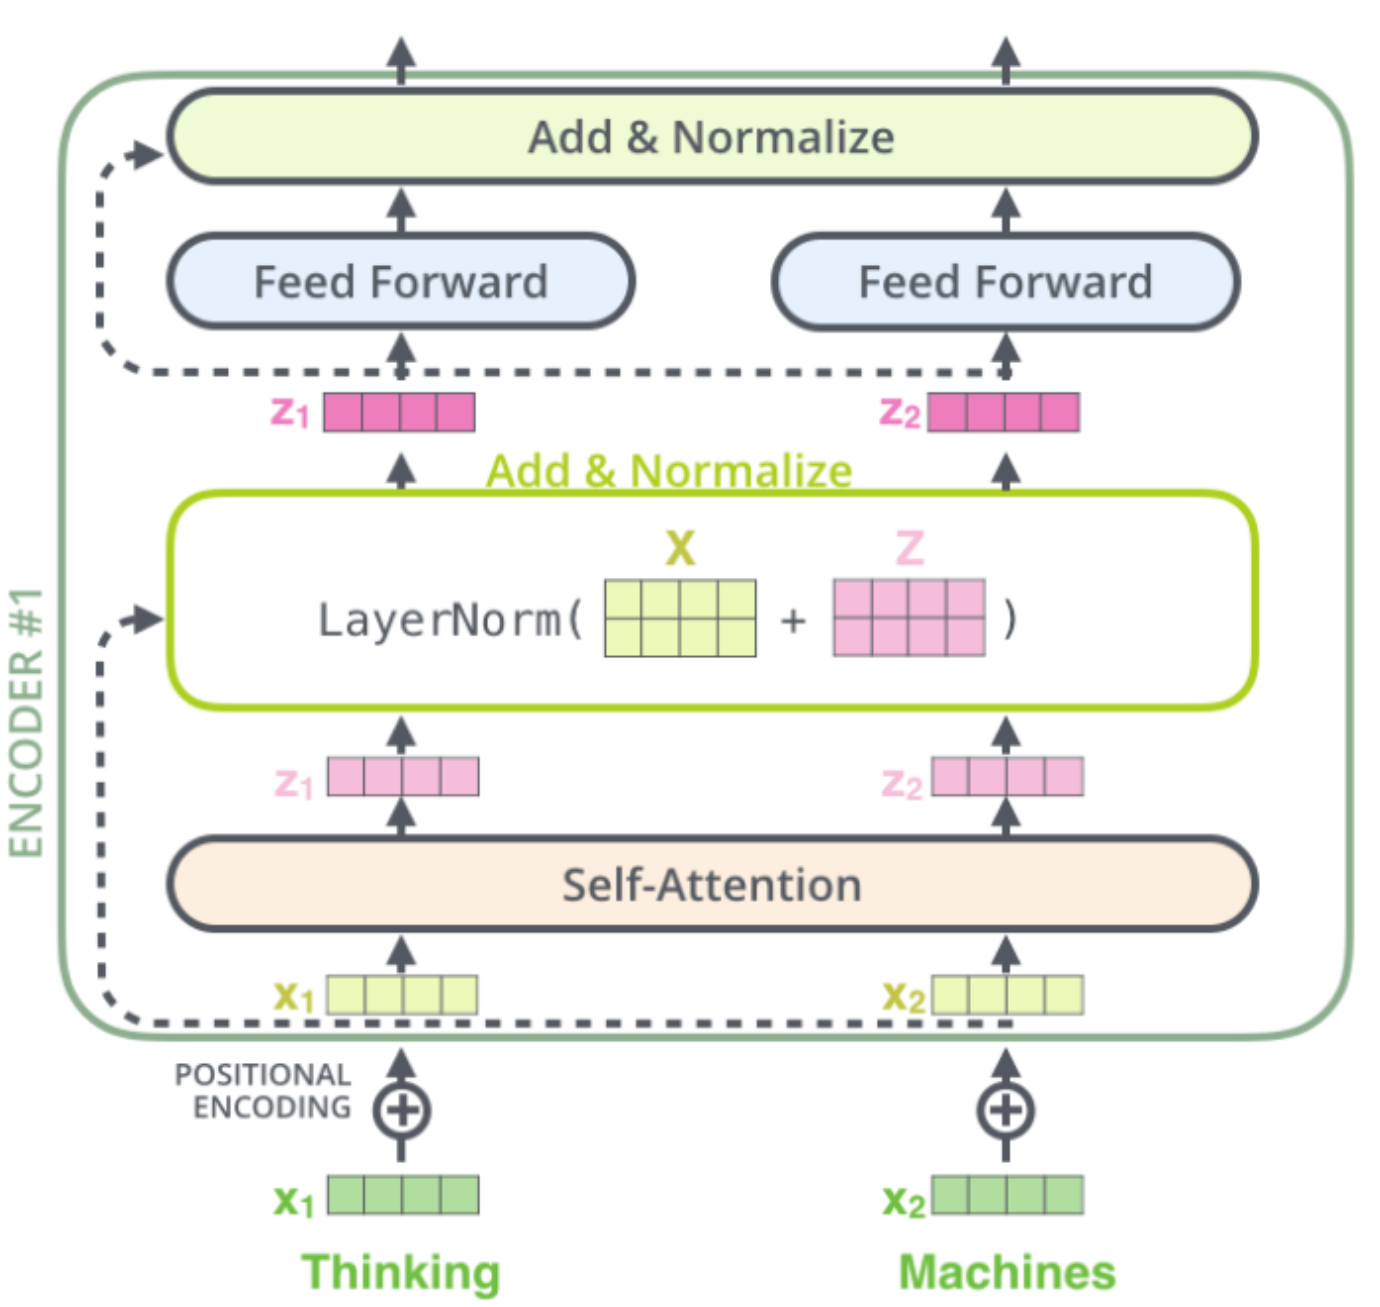

Implement the forward function below by composing the modules: SelfAttention, LayerNorm, and mlp

In [ ]:
class TransformerBlock(nn.Module):
  """ Block to instantiate transformers. """

  def __init__(self, k, heads):
    """
    Initiates following attributes
    attention: Initiating Multi-head Self-Attention layer
    norm1, norm2: Initiating Layer Norms
    mlp: Initiating Feed Forward Neural Network

    Args:
      k: Integer
        Attention embedding size
      heads: Integer
        Number of self-attention heads

    Returns:
      Nothing
    """
    super().__init__()

    self.attention = SelfAttention(k, heads=heads)

    self.norm_1 = nn.LayerNorm(k)
    self.norm_2 = nn.LayerNorm(k)

    hidden_size = 2 * k  # This is a somewhat arbitrary choice
    self.mlp = nn.Sequential(
        nn.Linear(k, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, k))

  def forward(self, x):
    """
    Defines the network structure and flow across a subset of transformer blocks

    Args:
      x: Tensor
        Input Sequence to be processed by the network

    Returns:
      x: Tensor
        Input post-processing by add and normalise blocks [See Architectural Block above for visual details]
    """

    # Complete the output of attention layer
    attended = 'TODO'
    # Complete the output of the first Add & Normalize layer
    x = 'TODO'
    # Complete the output of feedforward layer
    feedforward = 'TODO'
    # Complete the ouput of the second Add & Normalize layer
    x = 'TODO'

    return x

In practice PyTorch’s `torch.nn.Transformer()` layer is used.

Documentation for the function can be found here: https://pytorch.org/docs/stable/generated/torch.nn.Transformer.html

In order to perform layer normalisation, in practice PyTorch’s `torch.nn.LayerNorm()` function is used.

# Transformer overview II

Transformers use attention in multiple ways.

Different Aspects of Attention in Transformers:

*   **Encoder Self-Attention**: This allows each word in the input to focus on other words in the same input. This mechanism can enable the model to capture syntactic and semantic information inherent in the sequence. For example, when processing the word "bank" in the sentence "He sat by the river bank," self-attention helps relate "bank" to "river," hinting at the likely meaning of "bank" in this context.
*   **Decoder Self-Attention**: Similar to the encoder's self-attention but it's used while generating the output sequence. Crucial for tasks where the order and relationship between generated tokens matter, such as in machine translation or text summarization. It ensures fluency and coherence in the generated text.
*   **Encoder-Decoder Attention**: Allows every step in the output sequence to focus on different parts of the input sequence. Think of this as the decoder asking the encoder, "Which parts of the input should I focus on while generating this part of the output?" In machine translation, for instance, while translating a verb, the decoder might focus on the subject of the original sentence to ensure subject-verb agreement in the translation.

### **Complexity of Decoding:**

When discussing computational complexity, the decoder's attention mechanisms, especially the encoder-decoder attention, can be expensive. If $n$ is the number of input words, $m$ is the number of output words, and $p$ is the embedding dimension, the overall complexity becomes vital when scaling up. As sequences get longer, the required computational resources grow substantially. With the addition of self-attention in the decoder and considering the embedding dimension, the computational needs grow rapidly. This complexity has been one of the motivators for research into more efficient attention mechanisms and sparse attention patterns.

Further readings: [Link 1](https://jalammar.github.io/illustrated-transformer/), [Link 2](https://towardsdatascience.com/illustrated-guide-to-transformers-step-by-step-explanation-f74876522bc0), [Link 3](https://jinglescode.github.io/2020/05/27/illustrated-guide-transformer/)

This [article](https://medium.com/@yulemoon/an-in-depth-look-at-the-transformer-based-models-22e5f5d17b6b) extensively covers Transformer-based models such as BERT, GPT, T5, BART, and XLNet.

# Positional Encoding - A Closer Look

**Understanding the Need for Positional Encoding:**

Transformers, inherently, do not have any notion of sequence order (i.e., they don’t "understand" which word comes before or after another). This is quite different from RNNs and LSTMs, where the sequential nature of the data is embedded in the architecture. For transformers to effectively work on sequence data like text, some method to account for positions is crucial.

**What is Positional Encoding?**

Positional encoding is a technique to give the model information about the relative position of each word in a sequence. These encodings are added directly to the embeddings, ensuring that the sum of the embeddings and the positional encodings is fed into the model. The idea is to make sure that each position gets a unique encoding.

**Sinusoidal Positional Encoding:**

The original transformer paper used a specific type of positional encoding based on sinusoidal functions. The choice of sinusoids is not arbitrary. Sinusoidal functions have a consistent frequency that allows the model to easily learn to attend to positions relative to the current position.

The formulae for the sinusoidal encodings are:

\begin{equation}
PE_{(pos,2i)} = \sin\left(\frac{pos}{10000^{2i/d_{\text{model}}}}\right)
\end{equation}
\begin{equation}
PE_{(pos,2i+1)} = \cos\left(\frac{pos}{10000^{2i/d_{\text{model}}}}\right)
\end{equation}
where $PE(p,i)$ is the positional encoding for position $p$ at dimension $i$.

$d$ is the dimensionality of the encoding (e.g., the hidden size of the model).

The positional encoding formula is meant to alternate between sine and cosine functions for every successive dimension.

**Advantages of Sinusoidal Positional Encoding:**

*   Infinite length: The function can theoretically generate encodings for sequences of any length, making it adaptable to varying sequence lengths.
*   Fixed size: Regardless of the sequence length, the size of positional encoding remains the same.

While positional encodings may seem like a minor detail, they play a pivotal role in the transformer’s capability. Without them, a transformer would treat "Jane loves John" and "John loves Jane" as the same, missing out on the change in meaning due to the word order.



### Understanding Positional Encoding through an example

Let's go through an example with embeddings dimension 2 for simplicity

"I"        -> [1.1, 2.2]

"love"     -> [2.3, 3.4]

"deep"     -> [3.4, 4.5]

"learning" -> [4.5, 5.6]

Compute the positional encoding using the sinusoidal functions. ie., calculate PE(0,0) and PE(0,1) for "I" at position p=0 as well as PE(1,0) and PE(1, 1) for "love" at position p=1 and so on.


For "I" at position p=0:

$PE(0, 0) = \sin\left(\frac{0}{10000^{0/2}}\right) = 0$

$PE(0, 1) = \cos\left(\frac{0}{10000^{2/2}}\right) = 1$

For "love" at position p=1:

$PE(1, 0) = ? $

$PE(1, 1) = ? $

For "deep" at position p=2:

$PE(2, 0) = ? $

$PE(2, 1) = ? $

For "learning" at position p=3:

$PE(3, 0) = ? $

$PE(3, 1) = ? $

Now , combine Embeddings with Positional Encoding.

"I"           = [1.1, 3.2]

"love"        = [2.3001, 3.9403]

"deep"        = [3.4002, 4.0839]

"learning"    = [4.5003, 4.6106]

Further reading: [Link 1](https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/), [Link 2](https://kazemnejad.com/blog/transformer_architecture_positional_encoding/), [Link 3](https://towardsdatascience.com/master-positional-encoding-part-i-63c05d90a0c3)

In [ ]:
# @title (Optional) Implement `PositionalEncoding()` function
# Go through the code to get familiarised with internal working of Positional Encoding

class PositionalEncoding(nn.Module):
  # Source: https://pytorch.org/tutorials/beginner/transformer_tutorial.html
  """ Block initiating Positional Encodings """

  def __init__(self, emb_size, dropout=0.1, max_len=512):
    """
    Constructs positional encodings
    Positional Encodings inject some information about the relative or absolute position of the tokens in the sequence.

    Args:
      emb_size: Integer
        Specifies embedding size
      dropout: Float
        Specifies Dropout probability hyperparameter
      max_len: Integer
        Specifies maximum sequence length

    Returns:
      Nothing
    """
    super(PositionalEncoding, self).__init__()
    self.dropout = nn.Dropout(p=dropout)

    pe = torch.zeros(max_len, emb_size)
    position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, emb_size, 2).float() * (-np.log(10000.0) / emb_size))

    # Each dimension of the positional encoding corresponds to a sinusoid.
    # The wavelengths form a geometric progression from 2π to 10000·2π.
    # This function is chosen as it's hypothesized that it would allow the model
    # to easily learn to attend by relative positions, since for any fixed offset k,
    # PEpos + k can be represented as a linear function of PEpos.



    pe[:, 0::2] = 'TODO' #Sinusoidal Encoding for Even Dimensions
    pe[:, 1::2] = 'TODO' #Sinusoidal Encoding for Odd Dimensions
    # Hint: You can use PyTorch methods for sin and cosine

    pe = pe.unsqueeze(0).transpose(0, 1)
    self.register_buffer('pe', pe)

  def forward(self, x):
    """
    Defines network structure

    Args:
      x: Tensor
        Input sequence

    Returns:
      x: Tensor
        Output is of the same shape as input with dropout and positional encodings
    """
    x = x + self.pe[:x.size(0), :]
    return self.dropout(x)

# Training Transformers - An Expanded View

**From Words to Embeddings:**

Every word in a sequence is converted into a dense vector representation called an embedding. Embeddings capture semantic meaning; for instance, words with similar meanings tend to have embeddings that are close in the vector space.

Embedding Initialization: Often, pretrained word embeddings like Word2Vec, GloVe, or embeddings from models like BERT can be used to initialize and fine-tune on specific tasks.

**Positional Encoding:**

As we discussed earlier, transformers need a way to account for the position of words in a sequence. This is achieved by adding positional encodings to word embeddings. It's crucial that these encodings are designed in a manner that allows the model to learn the relative positions of words.

**Processing through Transformer Blocks:**

Each transformer block consists of multiple layers, and as data flows through these layers, the representations become more abstract, capturing higher-level features.

*   Residual Connections: These are essential in deep architectures. They allow gradients to flow through networks, mitigating the vanishing gradient problem.
*   Dropout and Regularization: Given the large number of parameters in transformers, regularization techniques like dropout are crucial to prevent overfitting.

**Classification Head:**

After the data has been processed through the transformer blocks, the resultant embeddings need to be converted into actionable outputs. For sequence classification tasks, a common approach is to use the embedding of the special [CLS] token or average the embeddings of all tokens.

*   Output Layers: Depending on the task, you might have a dense layer for classification, a linear layer for regression, or even more complex structures for tasks like named entity recognition or machine translation.

**Optimization and Training:**

Transformers can be tricky to train:

*   Learning Rate and Warm-up: Transformers benefit from a variable learning rate, especially one that warms up and then decays.
*   Gradient Clipping: Due to the self-attention mechanism, gradients can become too large, which can cause training instability. Gradient clipping is often employed to tackle this.

Reading Material for Further Insights:

*   https://nlp.seas.harvard.edu/2018/04/03/attention.html
*   https://towardsdatascience.com/transformers-141e32e69591

Remember, while transformers have shown state-of-the-art performance across many tasks, training them requires a balance of theory, intuition, and experimentation. As with any deep learning model, understanding the intricacies can lead to better model performance and more effective problem solving.

## Transformer Architecture for classification

Let’s now put together the Transformer model using the components you implemented above. We will use the model for text classification. Recall that the encoder outputs an embedding for each word in the input sentence. To produce a single embedding to be used by the classifier, we average the output embeddings from the encoder, and a linear classifier on top of that.

Compute the mean pooling function below.

In [ ]:
class Transformer(nn.Module):
  """ Transformer Encoder network for classification. """

  def __init__(self, k, heads, depth, seq_length, num_tokens, num_classes):
    """
    Initiates the Transformer Network

    Args:
      k: Integer
        Attention embedding size
      heads: Integer
        Number of self attention heads
      depth: Integer
        Number of Transformer Blocks
      seq_length: Integer
        Length of input sequence
      num_tokens: Integer
        Size of dictionary
      num_classes: Integer
        Number of output classes

    Returns:
      Nothing
    """
    super().__init__()

    self.k = k
    self.num_tokens = num_tokens
    self.token_embedding = nn.Embedding(num_tokens, k)
    self.pos_enc = PositionalEncoding(k)

    transformer_blocks = []
    for i in range(depth):
      transformer_blocks.append(TransformerBlock(k=k, heads=heads))

    self.transformer_blocks = nn.Sequential(*transformer_blocks)
    self.classification_head = nn.Linear(k, num_classes)

  def forward(self, x):
    """
    Forward pass for Classification within Transformer network

    Args:
      x: Tensor
        (b, t) sized tensor of tokenized words

    Returns:
      logprobs: Tensor
        Log-probabilities over classes sized (b, c)
    """
    x = 'TODO' * np.sqrt(self.k) #To perform embedding
    x = 'TODO' #To perform positional encoding
    x = 'TODO' #To perform transformer block appending

    sequence_avg = x.mean(dim=1)
    x = 'TODO' #To perform classification task
    logprobs = F.log_softmax(x, dim=1)
    return logprobs

## Training the Transformer
Let’s now run the Transformer on the Yelp dataset!

**Task**: The goal in training a model on this dataset would be to predict the star rating of a Yelp review. Given a review's text, the model should predict whether it's a 1, 2, 3, 4, or 5-star review.

**Number of Classes**: The "yelp_review_full" dataset has reviews associated with star ratings from 1 to 5. This means there are five classes in this classification task.

**Type of Classification**: Given that there are five classes (each star rating from 1 to 5), this is a multi-class classification task. Each review is categorized into one of five classes based on its star rating.

**Nature of Classes**: The classes are ordinal in nature. A rating of 1 star is worse than a rating of 2 stars, which is worse than a rating of 3 stars, and so on. However, when using typical classification algorithms, this ordinal relationship might not be directly considered unless you employ specialized techniques or treat it as a regression problem.

In [ ]:
# @title Set random seed

# @markdown Executing `set_seed(seed=seed)` you are setting the seed

# for DL its critical to set the random seed so that students can have a
# baseline to compare their results to expected results.
# Read more here: https://pytorch.org/docs/stable/notes/randomness.html

# Call `set_seed` function in the exercises to ensure reproducibility.
import random
import torch

def set_seed(seed=None, seed_torch=True):
  """
  Handles variability by controlling sources of randomness
  through set seed values

  Args:
    seed: Integer
      Set the seed value to given integer.
      If no seed, set seed value to random integer in the range 2^32
    seed_torch: Bool
      Seeds the random number generator for all devices to
      offer some guarantees on reproducibility

  Returns:
    Nothing
  """
  if seed is None:
    seed = np.random.choice(2 ** 32)
  random.seed(seed)
  np.random.seed(seed)
  if seed_torch:
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

  print(f'Random seed {seed} has been set.')


# In case that `DataLoader` is used
def seed_worker(worker_id):
  """
  DataLoader will reseed workers following randomness in
  multi-process data loading algorithm.

  Args:
    worker_id: integer
      ID of subprocess to seed. 0 means that
      the data will be loaded in the main process
      Refer: https://pytorch.org/docs/stable/data.html#data-loading-randomness for more details

  Returns:
    Nothing
  """
  worker_seed = torch.initial_seed() % 2**32
  np.random.seed(worker_seed)
  random.seed(worker_seed)

In [ ]:
# @title Set device (GPU or CPU). Execute `set_device()`
# especially if torch modules used.

# inform the user if the notebook uses GPU or CPU.

def set_device():
  """
  Set the device. CUDA if available, CPU otherwise

  Args:
    None

  Returns:
    Nothing
  """
  device = "cuda" if torch.cuda.is_available() else "cpu"
  if device != "cuda":
    print("WARNING: For this notebook to perform best, "
        "if possible, in the menu under `Runtime` -> "
        "`Change runtime type.`  select `GPU` ")
  else:
    print("GPU is enabled in this notebook.")

  return device

In [ ]:
SEED = 2021
set_seed(seed=SEED)
DEVICE = set_device()

In [ ]:
# @title `load_yelp_data` helper function

def load_yelp_data(DATASET, tokenizer):
  """
  Load Train and Test sets from the YELP dataset.

  Args:
    DATASET: datasets.dataset_dict.DatasetDict
      Dataset dictionary object containing 'train' and 'test' sets of YELP reviews and sentiment classes
    tokenizer: Transformer autotokenizer object
      Downloaded vocabulary from bert-base-cased and cache.

  Returns:
    train_loader: Iterable
      Dataloader for the Training set with corresponding batch size
    test_loader: Iterable
      Dataloader for the Test set with corresponding batch size
    max_len: Integer
      Input sequence size
    vocab_size: Integer
      Size of the base vocabulary (without the added tokens).
    num_classes: Integer
      Number of sentiment class labels
  """
  dataset = DATASET
  dataset['train'] = dataset['train'].select(range(10000))
  dataset['test'] = dataset['test'].select(range(5000))
  dataset = dataset.map(lambda e: tokenizer(e['text'], truncation=True,
                                            padding='max_length'), batched=True)
  dataset.set_format(type='torch', columns=['input_ids', 'label'])

  train_loader = torch.utils.data.DataLoader(dataset['train'], batch_size=32)
  test_loader = torch.utils.data.DataLoader(dataset['test'], batch_size=32)

  vocab_size = tokenizer.vocab_size
  max_len = next(iter(train_loader))['input_ids'].shape[0]
  num_classes = next(iter(train_loader))['label'].shape[0]

  return train_loader, test_loader, max_len, vocab_size, num_classes

In [ ]:
# @title Download and load the dataset

import requests, tarfile

os.environ['HF_DATASETS_CACHE'] = 'data/'

url = "https://osf.io/kthjg/download"
fname = "huggingface.tar.gz"

if not os.path.exists(fname):
  print('Dataset is being downloading...')
  r = requests.get(url, allow_redirects=True)
  with open(fname, 'wb') as fd:
    fd.write(r.content)
  print('Download is finished.')

  with tarfile.open(fname) as ft:
    ft.extractall('data/')
  print('Files have been extracted.')

DATASET = datasets.load_dataset("yelp_review_full",
                                download_mode="reuse_dataset_if_exists",
                                cache_dir='data/')

# If the above produces an error uncomment below:
# DATASET = load_dataset("yelp_review_full", ignore_verifications=True)
print(type(DATASET))

### Tokenizer

A tokenizer is in charge of preparing the inputs for a model i.e., splitting strings in sub-word token strings, converting tokens strings to ids and back, and encoding/decoding (i.e., tokenizing and converting to integers). There are multiple tokenizer variants. BERT base model (cased) has been used here. BERT is a transformers model pretrained on a large corpus of English data in a self-supervised fashion. Pretrained model on English language using a masked language modeling (MLM) objective. This model is case-sensitive: it differentiates between english and English. For more information, see [here](https://huggingface.co/bert-base-cased).

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased', cache_dir='data/')
train_loader, test_loader, max_len, vocab_size, num_classes = load_yelp_data(DATASET, tokenizer)

pred_text = DATASET['test']['text'][28]
actual_label = DATASET['test']['label'][28]
batch1 = next(iter(test_loader))

#Training

In [ ]:
def train(model, loss_fn, train_loader,
          n_iter=1, learning_rate=1e-4,
          test_loader=None, device='cpu',
          L2_penalty=0, L1_penalty=0):
  """
  Run gradient descent to opimize parameters of a given network

  Args:
    net: nn.Module
      PyTorch network whose parameters to optimize
    loss_fn: nn.Module
      Built-in PyTorch loss function to minimize
    train_data: Tensor
      n_train x n_neurons tensor with neural responses to train on
    train_labels: Tensor
      n_train x 1 tensor with orientations of the stimuli corresponding to each row of train_data
    n_iter: Integer, optional
      Number of iterations of gradient descent to run
    learning_rate: Float, optional
      Learning rate to use for gradient descent
    test_data: Tensor, optional
      n_test x n_neurons tensor with neural responses to test on
    test_labels: Tensor, optional
      n_test x 1 tensor with orientations of the stimuli corresponding to each row of test_data
    L2_penalty: Float, optional
      l2 penalty regularizer coefficient
    L1_penalty: Float, optional
      l1 penalty regularizer coefficient

  Returns:
    train_loss/test_loss: List
      Training/Test loss over iterations
  """

  # Initialize PyTorch Adam optimizer
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  # Placeholder to save the loss at each iteration
  train_loss = []
  test_loss = []

  # Loop over epochs (cf. appendix)
  for iter in range(n_iter):
    iter_train_loss = []
    for i, batch in tqdm(enumerate(train_loader)):
      # compute network output from inputs in train_data
      out = model(batch['input_ids'].to(device))
      loss = loss_fn(out, batch['label'].to(device))

      # Clear previous gradients
      optimizer.zero_grad()

      # Compute gradients
      loss.backward()

      # Update weights
      optimizer.step()

      # Store current value of loss
      iter_train_loss.append(loss.item())  # .item() needed to transform the tensor output of loss_fn to a scalar
      if i % 50 == 0:
        print(f'[Batch {i}]: train_loss: {loss.item()}')
    train_loss.append(statistics.mean(iter_train_loss))

    # Track progress
    if True:  # (iter + 1) % (n_iter // 5) == 0:

      if test_loader is not None:
        print('Running Test loop')
        iter_loss_test = []
        for j, test_batch in enumerate(test_loader):

          out_test = model(test_batch['input_ids'].to(device))
          loss_test = loss_fn(out_test, test_batch['label'].to(device))
          iter_loss_test.append(loss_test.item())

        test_loss.append(statistics.mean(iter_loss_test))

      if test_loader is None:
        print(f'iteration {iter + 1}/{n_iter} | train loss: {loss.item():.3f}')
      else:
        print(f'iteration {iter + 1}/{n_iter} | train loss: {loss.item():.3f} | test_loss: {loss_test.item():.3f}')

  if test_loader is None:
    return train_loss
  else:
    return train_loss, test_loss


# Set random seeds for reproducibility
set_seed(seed=SEED)

# Initialize network with embedding size 128, 8 attention heads, and 3 layers
model = 'TODO' #Don't forget to send it to device!
# .to(DEVICE) allows for efficient computation by making use of GPUs,
# and it's a common practice in deep learning to ensure that both the model
# and data reside on the same device (either CPU or GPU) before performing operations or training.

# Initialize built-in PyTorch Negative Log Likelihood loss function
loss_fn = F.nll_loss

# Run only on GPU, unless take a lot of time!
if DEVICE != 'cpu':
  train_loss, test_loss = 'TODO'

## Prediction
Check out the predictions.



In [ ]:
with torch.no_grad():
  # Batch 1 contains all the tokenized text for the 1st batch of the test loader
  pred_batch = model(batch1['input_ids'].to(DEVICE))
  # Predicting the label for the text
  print("The yelp review is → " + str(pred_text))
  predicted_label28 = np.argmax(pred_batch[28].cpu())
  print()
  print("The Predicted Rating is → " + str(predicted_label28.item()) + " and the Actual Rating was → " + str(actual_label))